#Intro

In [1]:
import pandas as pd
x_train = pd.read_csv('X_train.csv')
x_test = pd.read_csv('X_val.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_val.csv')

Model Results from previous stages are displayed.

In [2]:
basic_models = pd.read_csv('Diss_basic_models_results.csv')
basic_models

,Model,MAE,MSE,RMSE
0,Linear Regression,0.041822,0.004631,0.068049
1,Ridge Regression,0.041820,0.004631,0.068049
2,Lasso,0.066641,0.009240,0.096127
3,K-Nearest Regressor,0.030386,0.002292,0.047878
4,Random Forrest,0.019428,0.000827,0.028757
5,Decision Tree,0.025846,0.001606,0.040078
6,Support Vector Machines,0.078275,0.009947,0.099734
7,Gradient Boosting,0.022914,0.001121,0.033485
8,XGBoost,0.020367,0.000869,0.029482
9,EBM,0.023651,0.001227,0.035029


In [3]:
tuned_models = pd.read_csv('Tuned_model_results.csv', index_col=0)
tuned_models

,Model,MAE,MSE,RMSE
0,Linear Regression,0.041829,0.004630,0.068047
1,Ridge Regression,0.041825,0.004630,0.068046
2,Lasso Regression,0.041829,0.004630,0.068047
3,KNeighborsRegressor,0.018235,0.001143,0.033809
4,RandomForestRegressor,0.012024,0.000397,0.019916
5,DecisionTreeRegressor,0.037641,0.003945,0.062808
6,SVR(),NaN,NaN,NaN
7,GradientBoostingRegressor,0.028737,0.001748,0.041805
8,XGBoost,0.011988,0.000385,0.019612
9,ExplainableBoostingRegressor,0.022397,0.001111,0.033337


In [4]:
stacked_model = pd.read_csv('Stacked Model Results.csv', index_col=0)
stacked_model

,Model,MAE,MSE,RMSE
0,Stacked Model,0.011308,0.000365,0.019112


The best models from each stage are identified and placed into a separate dataframe

In [5]:
basic_models_min = basic_models[basic_models.MSE == basic_models.MSE.min()]
basic_models_min

,Model,MAE,MSE,RMSE
4,Random Forrest,0.019428,0.000827,0.028757


In [6]:
tuned_models_min = tuned_models[tuned_models.MSE == tuned_models.MSE.min()]
tuned_models_min

,Model,MAE,MSE,RMSE
8,XGBoost,0.011988,0.000385,0.019612


In [7]:
best_models = pd.concat([basic_models_min, tuned_models_min, stacked_model])
best_models

,Model,MAE,MSE,RMSE
4,Random Forrest,0.019428,0.000827,0.028757
8,XGBoost,0.011988,0.000385,0.019612
0,Stacked Model,0.011308,0.000365,0.019112


The best performing model is the tuned XGBoost model. This is the model that will be used for SHAP analysis.

In [8]:
import xgboost as xg
xgb = xg.XGBRegressor()

In [9]:
import xgboost as xg
xgb2 = xg.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=100)

In [10]:
#Installation
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.9 MB/s eta 0:00:00


In [11]:
#Installation
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 16.5 MB/s eta 0:00:00


In [12]:
import shap

#Shap1

In [13]:
x_train_here = x_train.values
y_train_here = y_train.values.ravel()

PermutationExplainer explainer: 6086it [38:05,  2.66it/s]


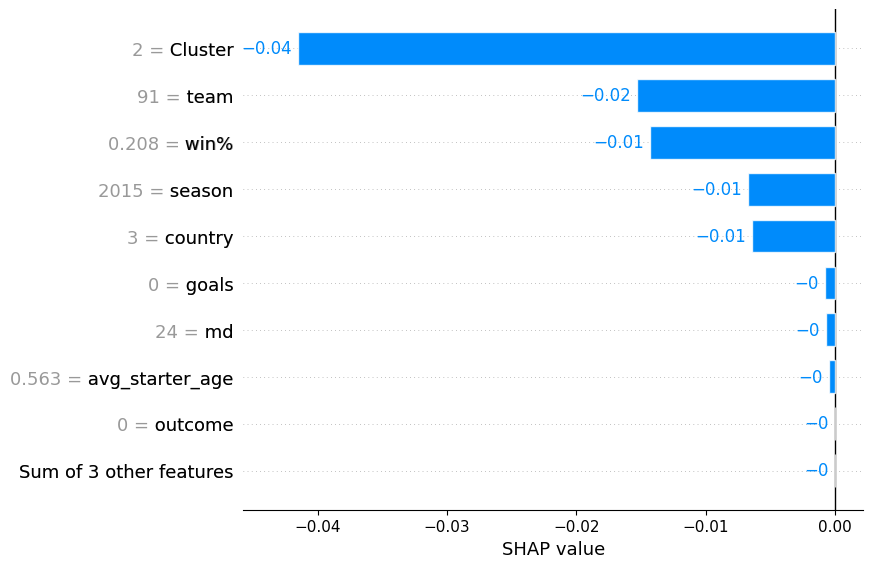

In [14]:
xgb2.fit(x_train_here, y_train_here)
explainer = shap.Explainer(xgb2.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

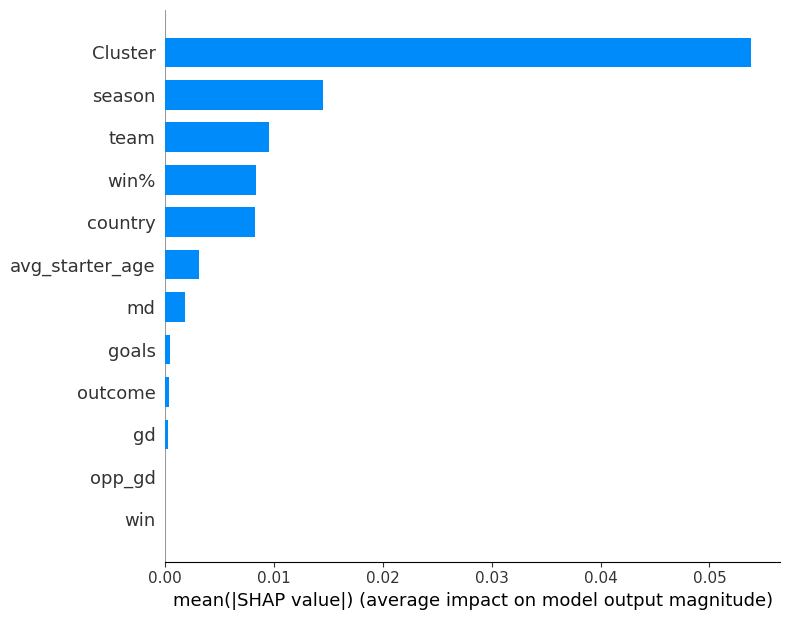

In [15]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

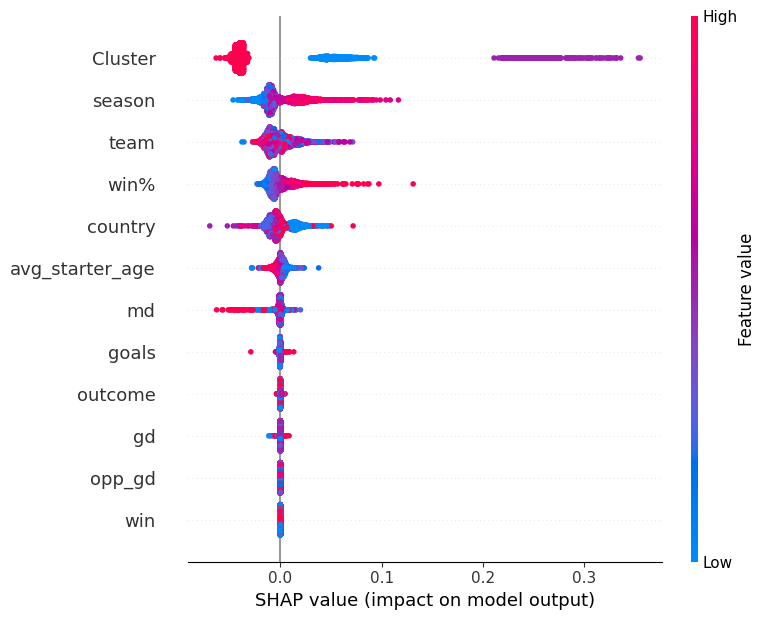

In [16]:
shap.summary_plot(shap_values, x_test)

In [17]:
xgb2.feature_importances_

array([4.2387592e-03, 3.2029245e-03, 3.1680879e-03, 6.5253279e-04,
       3.0452790e-04, 9.8440725e-01, 0.0000000e+00, 3.9974815e-04,
       4.2111782e-04, 0.0000000e+00, 7.9381571e-04, 2.4112207e-03],
      dtype=float32)

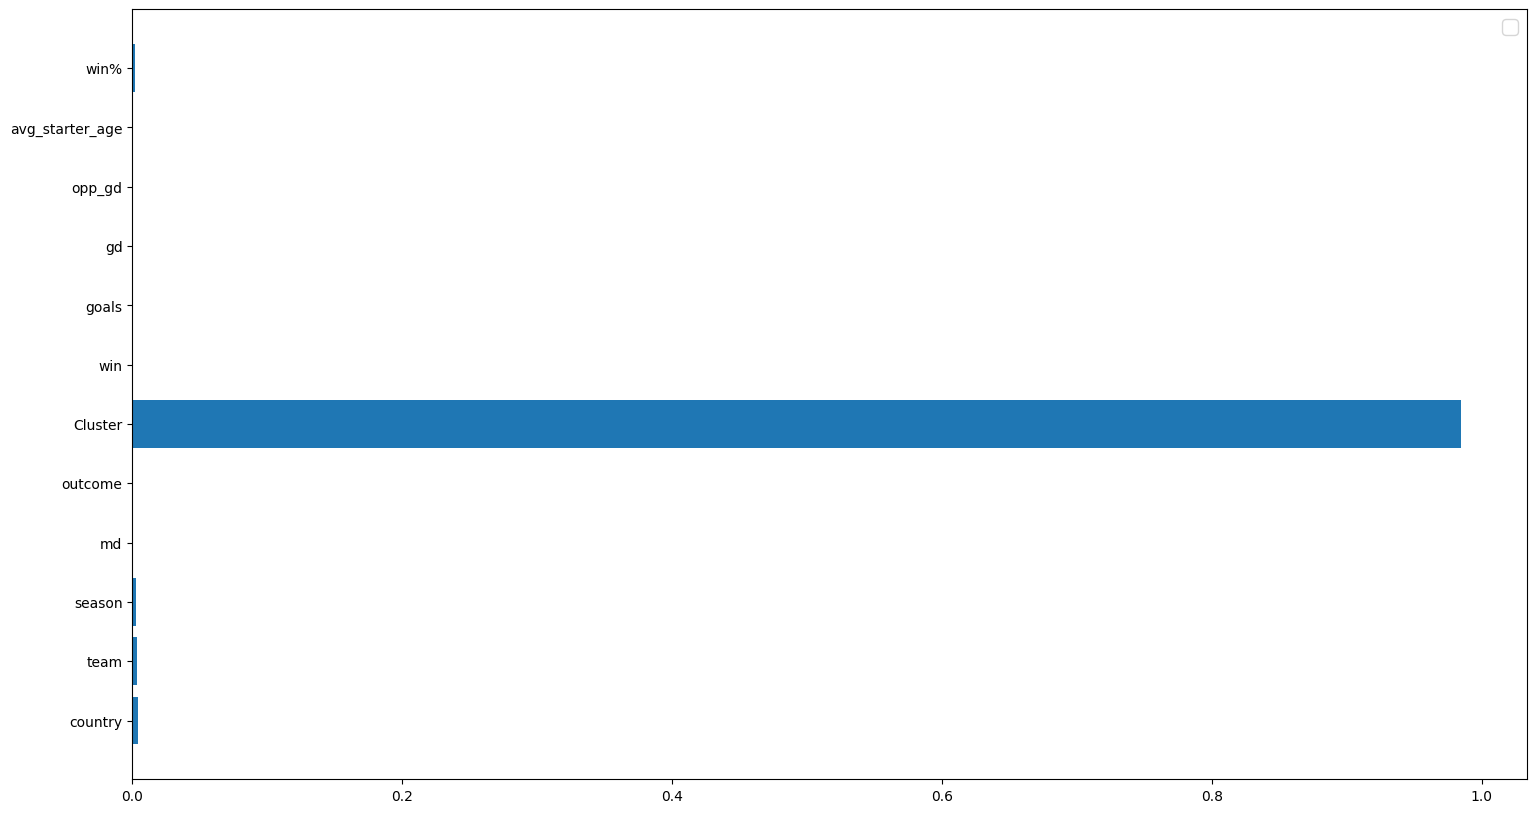

In [18]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, xgb2.feature_importances_)
ax.legend(fontsize = 14)

It is clear from the visualisations above that the 'Cluster' variable dominates the model. This is removed to get a more representative idea of what leads to valuable football teams.

#Shap2

In [19]:
x_train = x_train.drop(['Cluster'], axis=1)

In [20]:
x_test = x_test.drop(['Cluster'], axis=1)

In [21]:
x_train_here = x_train.values
y_train_here = y_train.values.ravel()

PermutationExplainer explainer: 6086it [38:49,  2.60it/s]


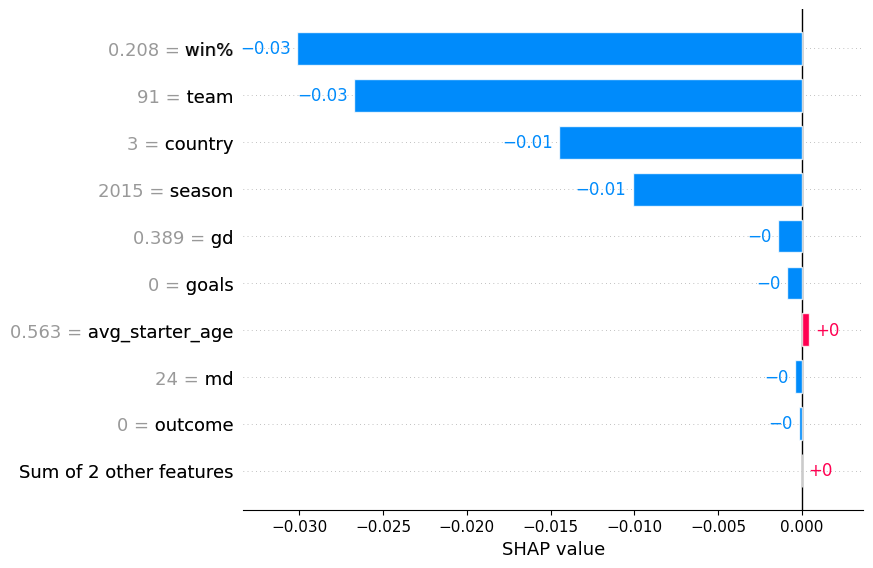

In [22]:
xgb2.fit(x_train_here, y_train_here)
explainer = shap.Explainer(xgb2.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

In [23]:
xgb2.feature_importances_

array([0.24312088, 0.10705855, 0.1835009 , 0.02960918, 0.00504777,
       0.        , 0.00785883, 0.00915921, 0.        , 0.01959009,
       0.39505452], dtype=float32)

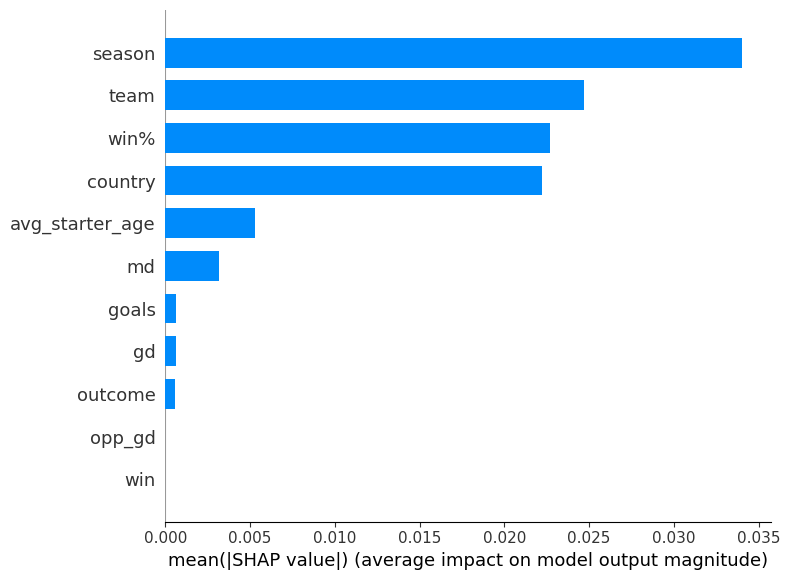

In [24]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

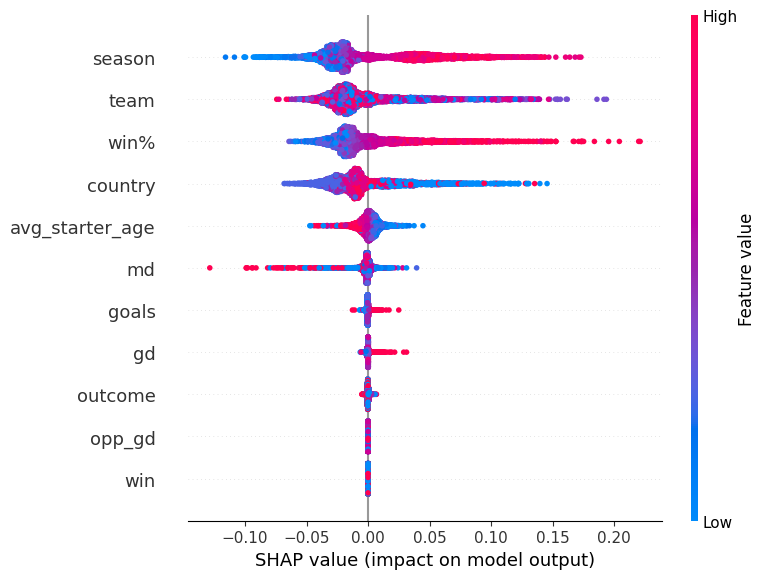

In [25]:
shap.summary_plot(shap_values, x_test)

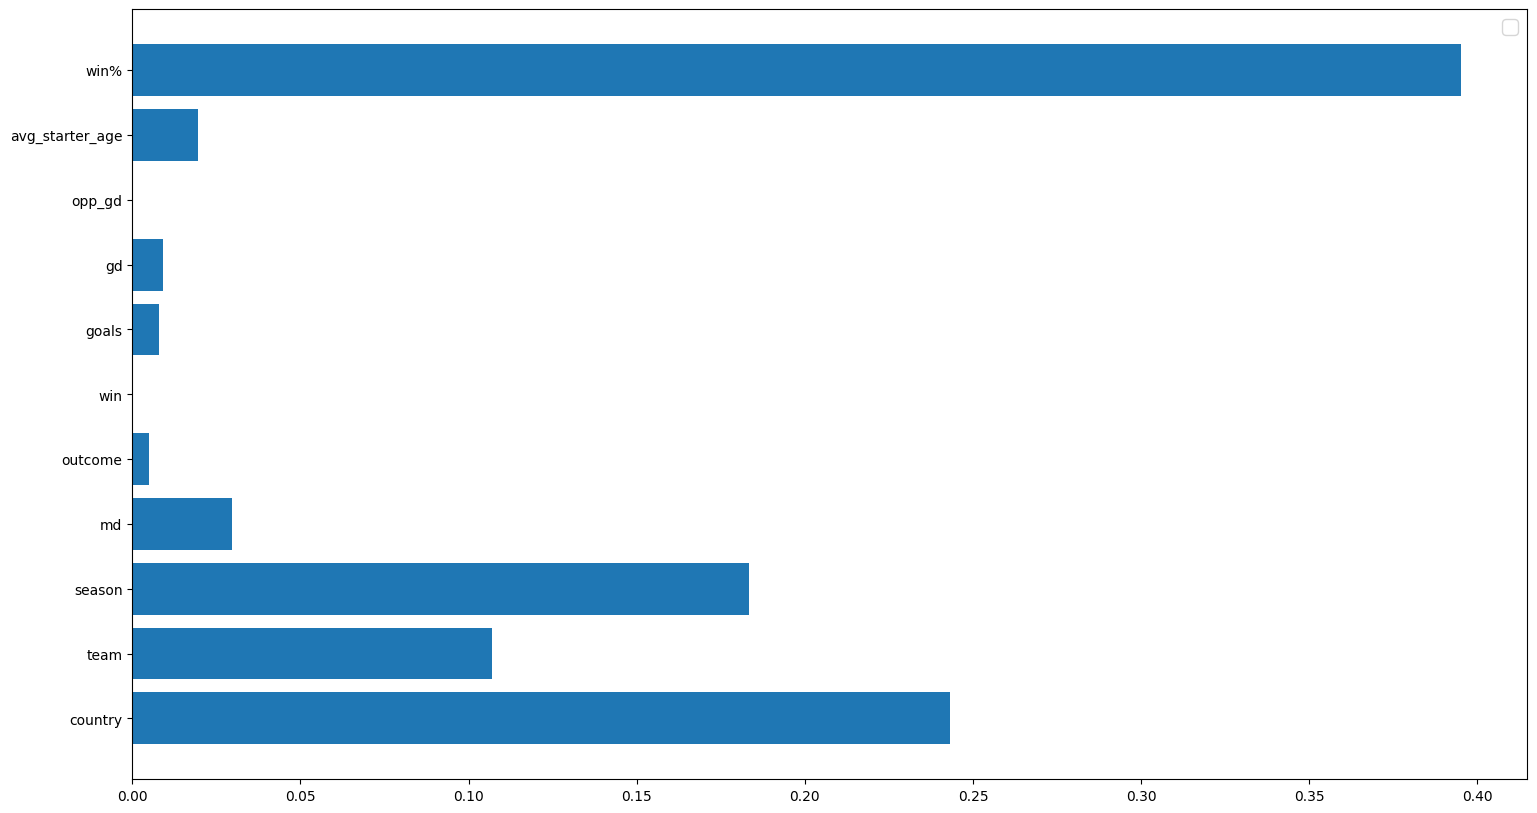

In [26]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, xgb2.feature_importances_)
ax.legend(fontsize = 14)

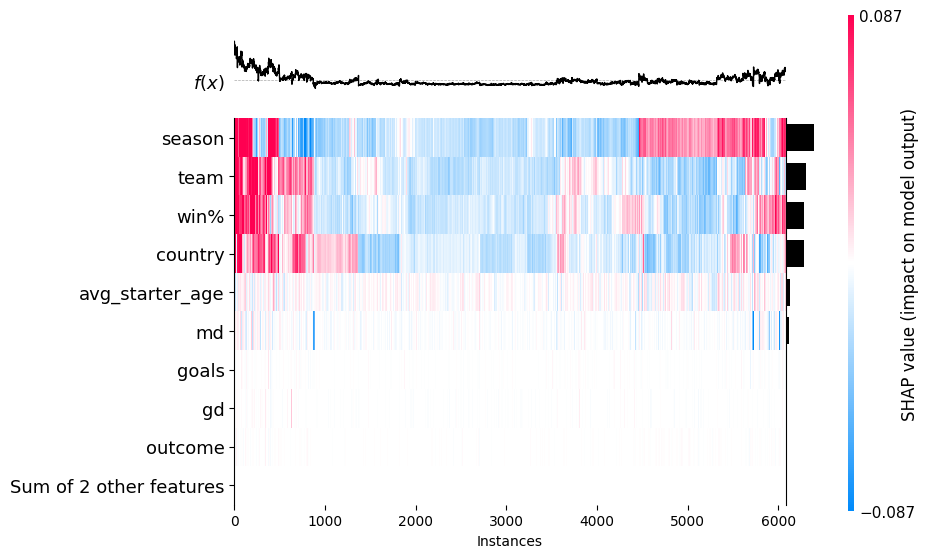

<Axes: xlabel='Instances'>

In [27]:
shap.plots.heatmap(shap_values)